In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
#load the datafile to DataFrame
diabetes_data=pd.read_csv("C:\Gopal\AIML\Python\diabetes.csv")

In [25]:
#understand the structure of dataframe (details of the dataset provided)
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [26]:
#to understand the shape of the dataset number of rows and columns 
print("Number of rows and columns in dataset : {}".format(diabetes_data.shape))

Number of rows and columns in dataset : (768, 9)


In [27]:
#Begin DATA EXPLORATION

#explore by looking at the first 10 rows of data provided
print(diabetes_data.head(10))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   2

In [121]:
#Check percentage of Diabetes and Non Diabetes in the data provided
num_observations=len(diabetes_data)
num_diabetes=len(diabetes_data[diabetes_data['Outcome']==1])
num_non_diabetes=len(diabetes_data[diabetes_data['Outcome']==0])

print("\n")
print("Number of Individuals with diabetes: {0} ({1:2.2f}%)".format(num_diabetes,(num_diabetes/num_observations)*100))
print("\n")
print("Number of Individuals without diabetest: {0} ({1:2.2f}%)".format(num_non_diabetes,(num_non_diabetes/num_observations)*100))
print("\n")



Number of Individuals with diabetes: 268 (34.90%)


Number of Individuals without diabetest: 500 (65.10%)




array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E5C78D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000E7EDD30>]], dtype=object)

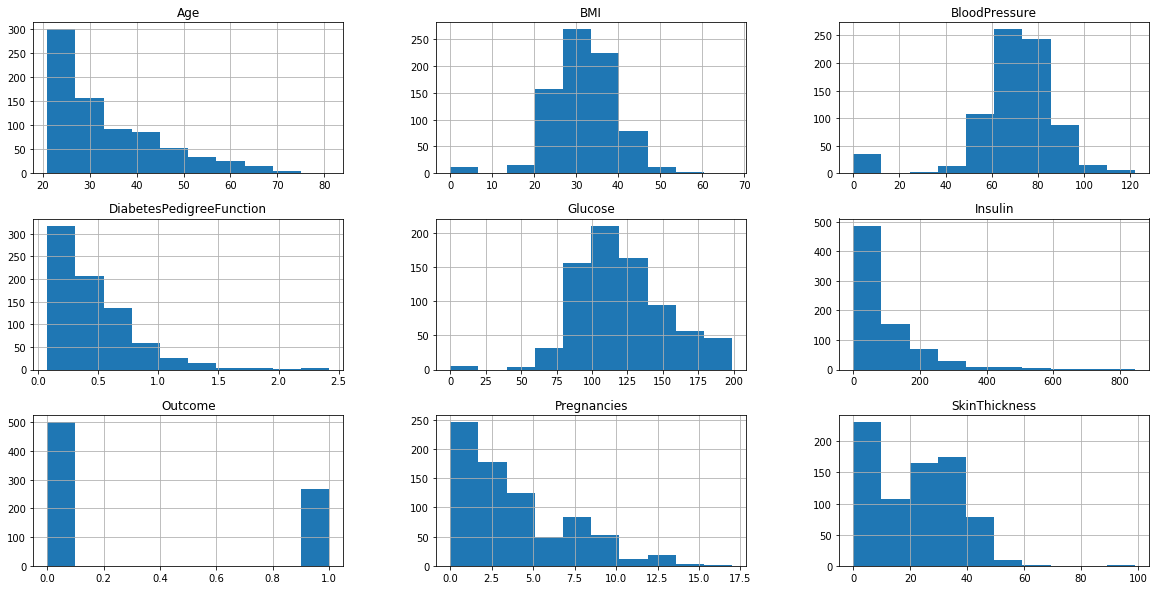

In [31]:
#look at the distribution of every attribute in the dataset
diabetes_data.hist(figsize=(20,10))

In [117]:
print(diabetes_data.skew())

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64


In [97]:
print('Attributes - Age, DiabetesPedigreeFunction, Insulin, Pregnancies, SkinThickness are highly skewed towards left')

Attributes - Age, DiabetesPedigreeFunction, Insulin, Pregnancies, SkinThickness are highly skewed towards left


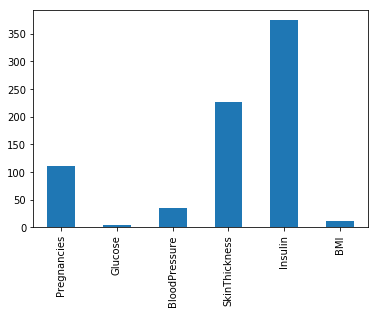

In [98]:
#we see minimum value as 0 for "Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI"
#would like to understand how many rows are having 0s in the total dataset
count_of_zeros=(diabetes_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]==0).sum()
count_of_zeros.plot(kind='bar')

In [103]:
print((diabetes_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]==0).sum())
print('\nAttributes - SkinThickness, Insulin, etc., are having more number of zero values in the distribution, \nwhich might have an impact on the result')

Pregnancies      111
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

Attributes - SkinThickness, Insulin, etc., are having more number of zero values in the distribution, 
which might have an impact on the result


In [110]:
#more about each attributes
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [125]:
pd.pivot_table(diabetes_data, values=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'],index='Outcome', aggfunc=np.mean)

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Pregnancies,SkinThickness
Outcome,,,,,,,,
0,31.190000,30.304200,68.184000,0.429734,109.980000,68.792000,3.298000,19.664000
1,37.067164,35.142537,70.824627,0.550500,141.257463,100.335821,4.865672,22.164179


Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

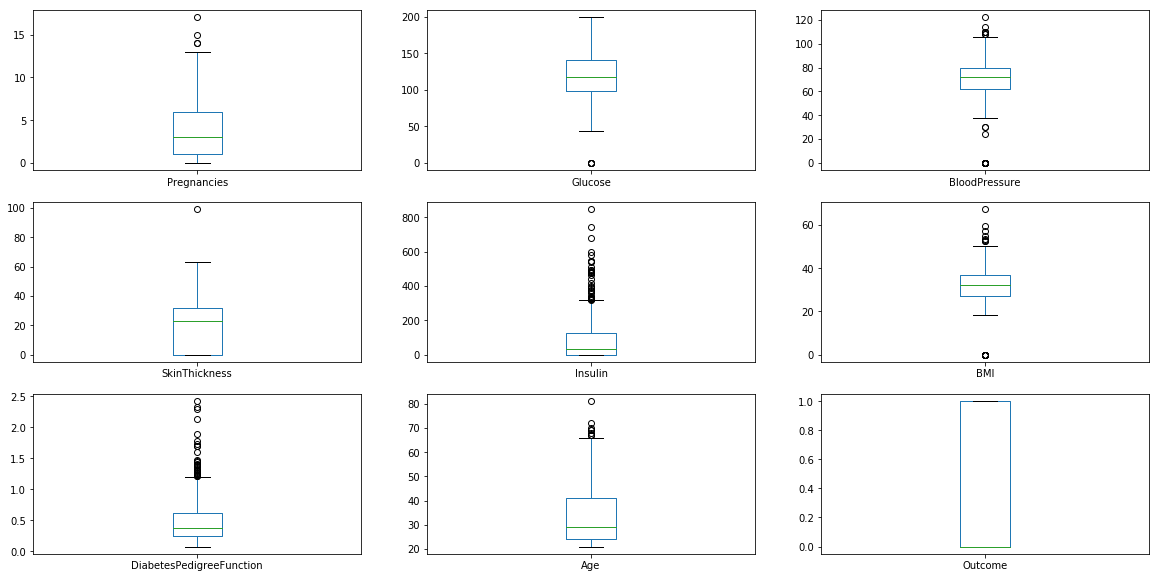

In [116]:
# Detecting Outliers for every attribute in the provided dataset
diabetes_data.plot(kind='box',subplots=True,layout=(3,3),sharex=False, sharey=False, figsize=(20,10))

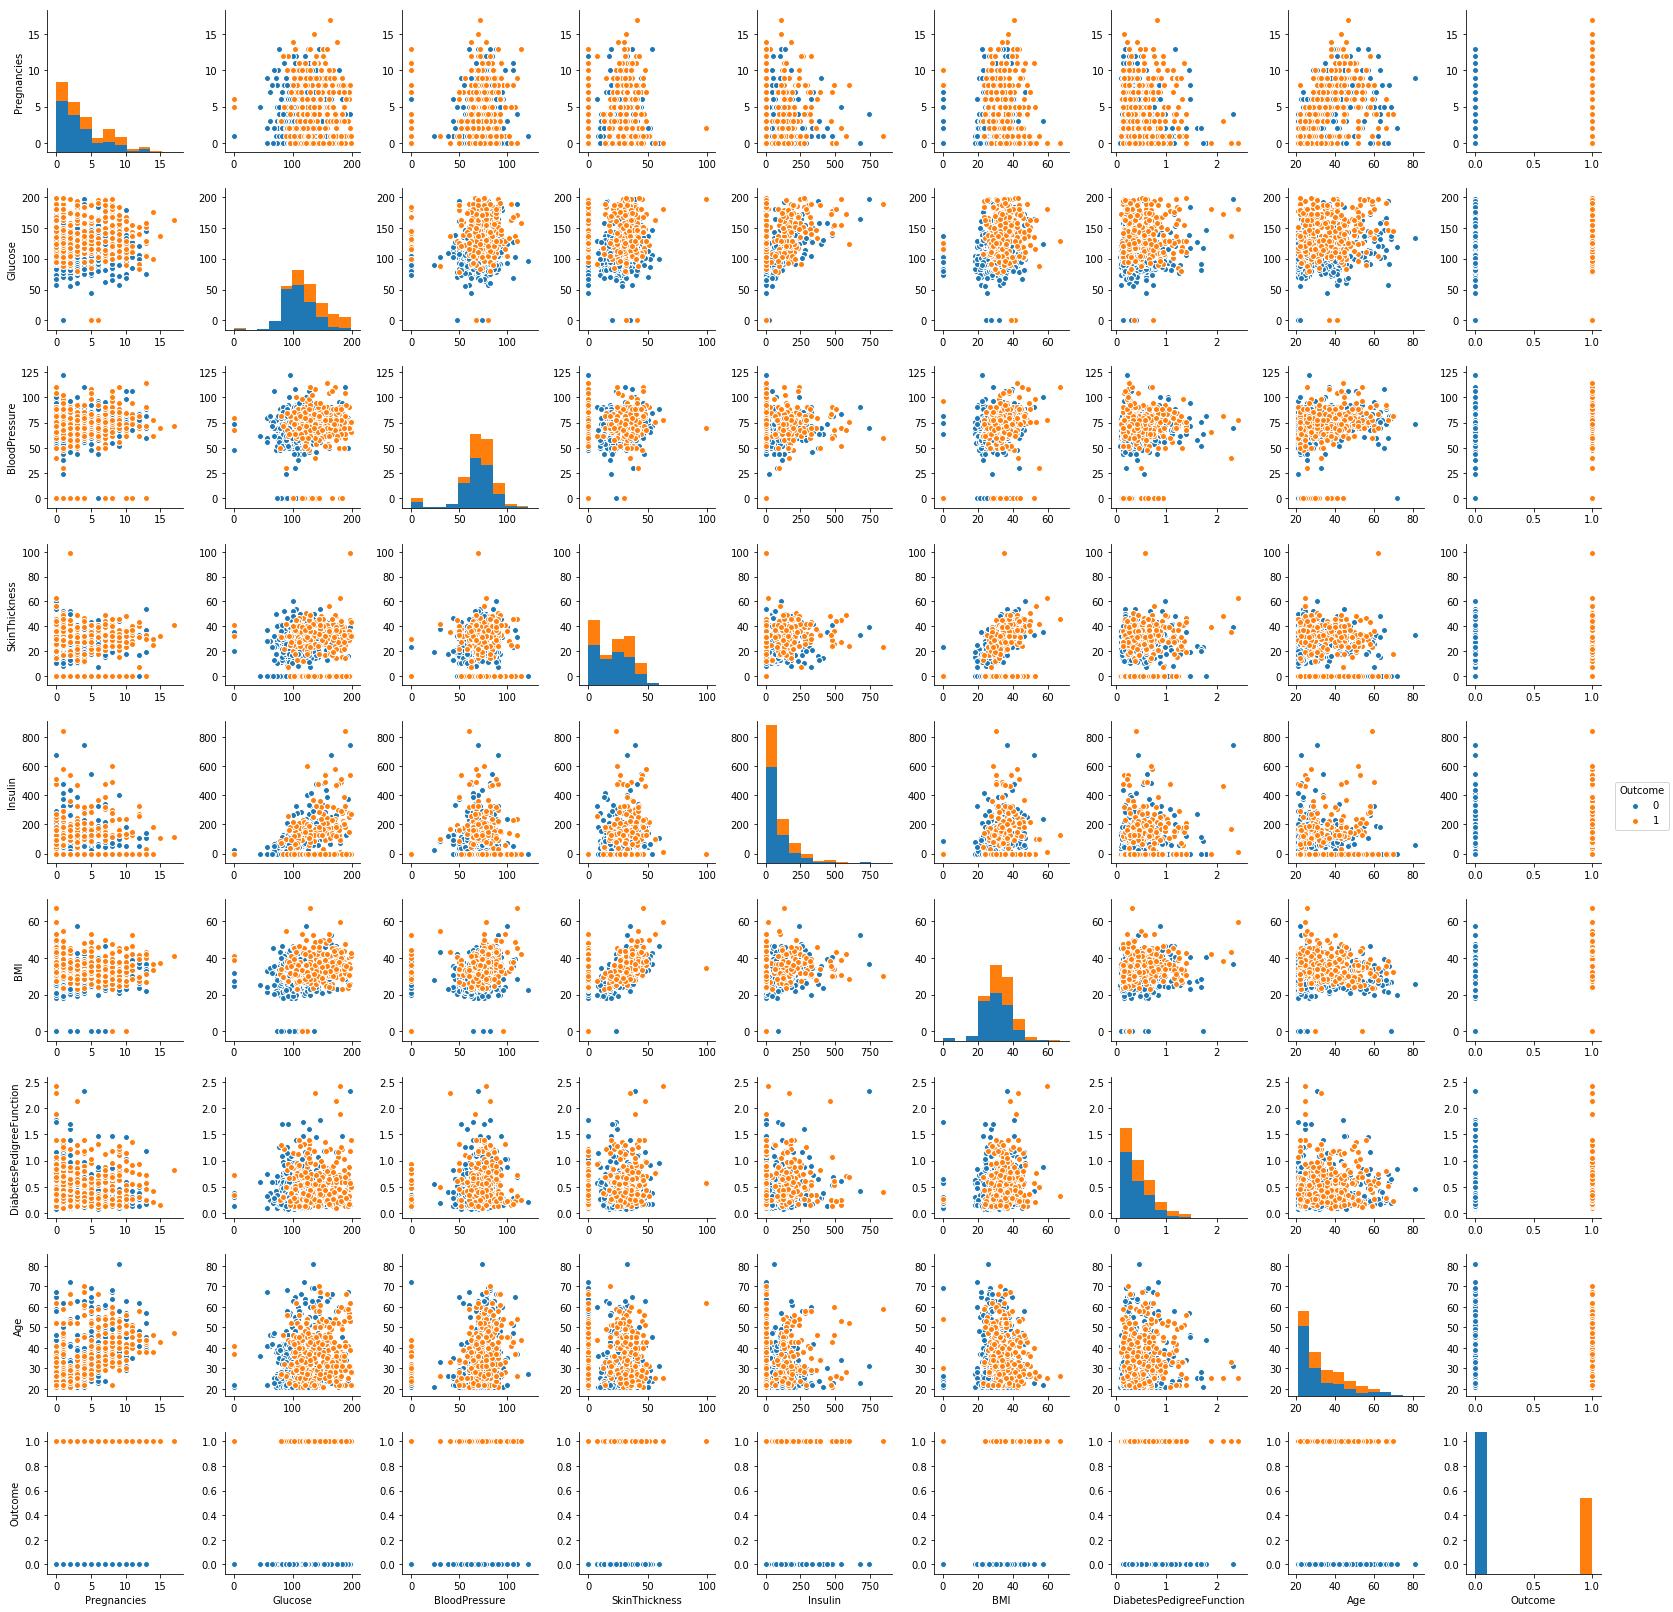

In [109]:
import seaborn as sns
sns.pairplot(diabetes_data,hue='Outcome')
plt.show()

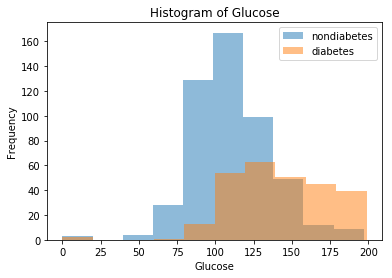

In [113]:
col='Glucose'
plt.hist(diabetes_data[diabetes_data['Outcome']==0][col], 10, alpha=0.5, label='nondiabetes')
plt.hist(diabetes_data[diabetes_data['Outcome']==1][col], 10, alpha=0.5,label='diabetes')
plt.legend(loc='upper right')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(col))
plt.show()

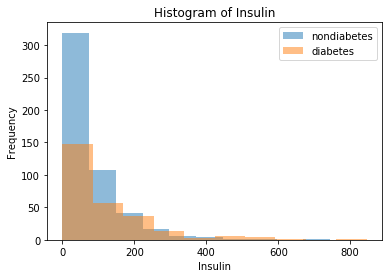

In [126]:
col='Insulin'
plt.hist(diabetes_data[diabetes_data['Outcome']==0][col], 10, alpha=0.5, label='nondiabetes')
plt.hist(diabetes_data[diabetes_data['Outcome']==1][col], 10, alpha=0.5,label='diabetes')
plt.legend(loc='upper right')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(col))
plt.show()

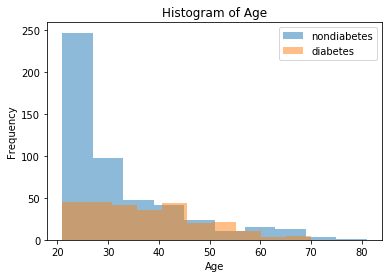

In [127]:
col='Age'
plt.hist(diabetes_data[diabetes_data['Outcome']==0][col], 10, alpha=0.5, label='nondiabetes')
plt.hist(diabetes_data[diabetes_data['Outcome']==1][col], 10, alpha=0.5,label='diabetes')
plt.legend(loc='upper right')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(col))
plt.show()

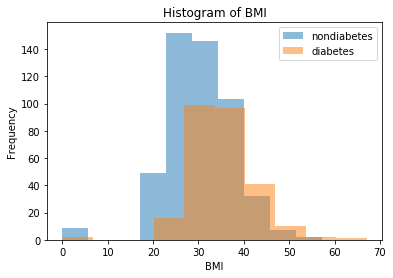

In [128]:
col='BMI'
plt.hist(diabetes_data[diabetes_data['Outcome']==0][col], 10, alpha=0.5, label='nondiabetes')
plt.hist(diabetes_data[diabetes_data['Outcome']==1][col], 10, alpha=0.5,label='diabetes')
plt.legend(loc='upper right')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(col))
plt.show()

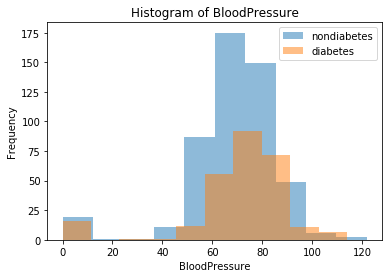

In [130]:
col='BloodPressure'
plt.hist(diabetes_data[diabetes_data['Outcome']==0][col], 10, alpha=0.5, label='nondiabetes')
plt.hist(diabetes_data[diabetes_data['Outcome']==1][col], 10, alpha=0.5,label='diabetes')
plt.legend(loc='upper right')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(col))
plt.show()

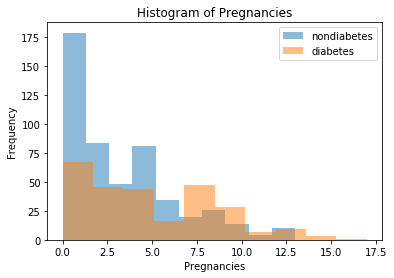

In [131]:
col='Pregnancies'
plt.hist(diabetes_data[diabetes_data['Outcome']==0][col], 10, alpha=0.5, label='nondiabetes')
plt.hist(diabetes_data[diabetes_data['Outcome']==1][col], 10, alpha=0.5,label='diabetes')
plt.legend(loc='upper right')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(col))
plt.show()

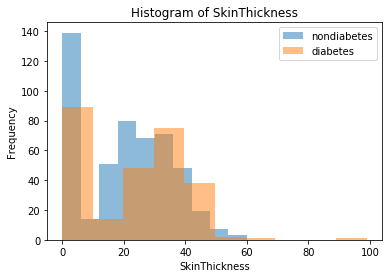

In [132]:
col='SkinThickness'
plt.hist(diabetes_data[diabetes_data['Outcome']==0][col], 10, alpha=0.5, label='nondiabetes')
plt.hist(diabetes_data[diabetes_data['Outcome']==1][col], 10, alpha=0.5,label='diabetes')
plt.legend(loc='upper right')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(col))
plt.show()

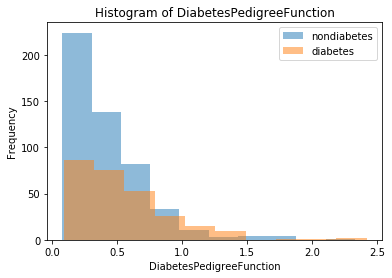

In [133]:
col='DiabetesPedigreeFunction'
plt.hist(diabetes_data[diabetes_data['Outcome']==0][col], 10, alpha=0.5, label='nondiabetes')
plt.hist(diabetes_data[diabetes_data['Outcome']==1][col], 10, alpha=0.5,label='diabetes')
plt.legend(loc='upper right')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(col))
plt.show()

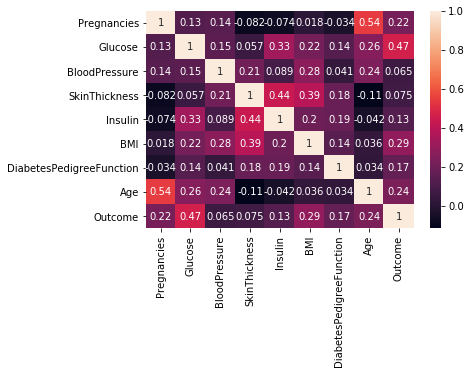

In [136]:
pd_corr=diabetes_data.corr()
pd_corr
sns.heatmap(pd_corr, annot=True)

In [138]:
sns.countplot(x=, hue="Outcome", data=diabetes_data)

TypeError: Argument 'obj' has incorrect type (expected list, got DataFrame)